In [1]:
import torch
from torch.utils.data import DataLoader, Dataset

class Data(Dataset):
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3 * self.x + 1 + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        if train:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__(self):
        return self.len

In [2]:
train_data = Data()
val_data = Data(train=False)

In [5]:
from torch import nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

criterion = nn.MSELoss()

train_loader = DataLoader(dataset=train_data, batch_size=5)

In [23]:
epochs = 10
lrs = [0.0001, 0.001, 0.01, 0.1]

train_error = torch.zeros(len(lrs))
validation_error = torch.zeros(len(lrs))

In [24]:
MODELS = []

In [25]:
from torch import optim

In [26]:
for i, lr in enumerate(lrs):
    model = LR(1, 1)
    optimizer = optim.SGD(model.parameters(), lr=lr)

    for epoch in range(epochs):
        for x, y in train_loader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    Y_hat = model(train_data.x)
    loss = criterion(Y_hat, train_data.y)
    train_error[i] = loss.item()
    MODELS.append(model)
    Y_hat = model(val_data.x)
    loss = criterion(Y_hat, val_data.y)
    validation_error[i] = loss.item()

In [27]:
print(train_error)
print(validation_error)

tensor([ 64.2610,  51.6877,  43.3806, 347.0718])
tensor([ 38.7349,  14.7981,  13.3689, 197.8599])


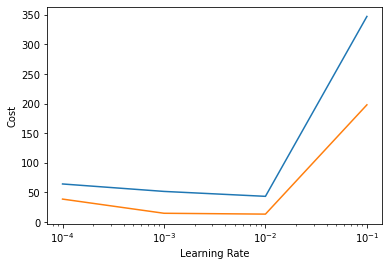

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.semilogx(np.array(lrs), train_error, label="Training Error")
plt.semilogx(np.array(lrs), validation_error, label="Validation Error")
plt.ylabel("Cost")
plt.xlabel("Learning Rate")
plt.show()

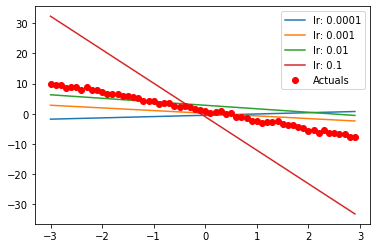

In [32]:
for model, lr in zip(MODELS, lrs):
    y_hat = model(val_data.x)
    plt.plot(val_data.x, y_hat.detach(), label=f"lr: {lr}")

plt.plot(val_data.x, val_data.y, "ro", label="Actuals")
plt.legend()
plt.show()